# Python Outlier Detection (PyOD) Autoencoder

PyOD is a comprehensive and scalable Python toolkit for detecting outlying objects in multivariate data.

Learning Objectives:
* Understand PyOD
* Use autoencoder to build three models: clf1, clf2, clf3
* Combination Methods

* You can find the Python PyOD Api [here](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example).

* You can find all the algorithms of PyOD [here](https://pyod.readthedocs.io/en/latest/) and [here](https://pyod.readthedocs.io/en/latest/pyod.html).

Assignment:
* Please select two algorithms to apply to your dataset.
* Your analysis should provide a clear description for each of the algorithm and the results.
* Your work should perform the combination methods.
* Justify your identification for the anomalies with the data attributes.

## FIrst, we generate a dataframe with outliers
* There are total 500 obsservations including 10%, or 50, outliers
* In your assignment, split your dataset to be X_train and X_test. Then you can follow accordingly.
* We do not use the iris dataset because it only has 4 variables. We build a large dataset with 25 variables in order to show the power of neural network.

In [177]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
#from pyod.utils.data import evaluate_print
#from pyod.utils.example import visualize

contamination = 0.1  # percentage of outliers
n_train = 500  # number of training points
n_test = 500  # number of testing points
n_features = 25 # Number of features

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test,
    n_features= n_features, 
    contamination=contamination,random_state=1234)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/pyod/utils/data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.7.2. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [178]:
#When you do unsupervised learning, it is always a safe step to standardize the predictors
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [179]:
X_train.shape

(500, 25)

In [180]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,3.666401e-15,1.563194e-15,5.968559e-16,3.225864e-15,-1.165290e-15,-2.557954e-15,-3.410605e-16,-6.536993e-16,9.379164e-16,-1.179501e-15,...,-1.648459e-15,1.548983e-15,-8.384404e-16,1.932676e-15,3.979039e-16,1.108447e-15,1.165290e-15,2.060574e-15,3.410605e-16,-1.591616e-15
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,...,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-4.732916e+00,-4.918818e+00,-4.542054e+00,-4.676037e+00,-4.391753e+00,-4.363311e+00,-4.691187e+00,-4.476611e+00,-4.697747e+00,-4.470780e+00,...,-4.757183e+00,-4.752962e+00,-4.598891e+00,-4.745416e+00,-4.599332e+00,-4.668164e+00,-4.684041e+00,-4.634132e+00,-4.705661e+00,-4.469690e+00
25%,-2.244510e-01,-2.769158e-01,-2.165146e-01,-2.302707e-01,-2.154463e-01,-2.011541e-01,-2.314189e-01,-2.063258e-01,-2.163067e-01,-1.745936e-01,...,-2.513275e-01,-2.278460e-01,-2.067922e-01,-2.336330e-01,-2.581449e-01,-2.820875e-01,-2.557290e-01,-2.083247e-01,-2.271273e-01,-2.088289e-01
50%,1.825450e-01,1.320281e-01,2.015343e-01,1.969562e-01,1.685158e-01,1.650063e-01,1.917340e-01,1.976351e-01,1.851597e-01,1.766163e-01,...,1.591869e-01,1.369808e-01,2.144007e-01,1.976444e-01,1.953438e-01,1.672627e-01,1.716094e-01,1.577927e-01,1.744004e-01,1.787251e-01
75%,5.355502e-01,5.797012e-01,5.039290e-01,5.616141e-01,5.560022e-01,5.585109e-01,5.428609e-01,5.377441e-01,5.527058e-01,5.323660e-01,...,5.592496e-01,5.539707e-01,5.239704e-01,5.477250e-01,6.023241e-01,5.712589e-01,5.909637e-01,5.380825e-01,5.923337e-01,5.362405e-01
max,1.517124e+00,1.663196e+00,1.632398e+00,1.650555e+00,1.712295e+00,1.775926e+00,1.818477e+00,1.733233e+00,1.513639e+00,1.575861e+00,...,1.743984e+00,2.004920e+00,1.862037e+00,1.429959e+00,1.696688e+00,1.821428e+00,1.644442e+00,1.777075e+00,1.691597e+00,1.677651e+00


### Plot in a 2-D space

In [181]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

,PC1,PC2
0,-1.374289,-0.290809
1,-1.430553,0.508865
2,-1.416714,1.039612
3,-1.158238,-0.018910
4,-0.874365,0.223768


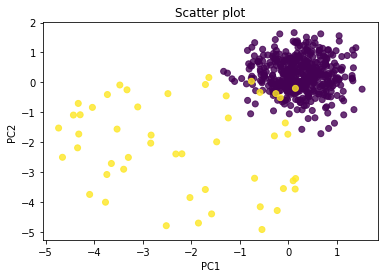

In [182]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(X_train[0], X_train[1], c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Autoencoder
* You do not need the target variable to train the unsupervised learning model.
* We will build three models: clf1, clf2, and clf3
* clf1 has hidden_neurons = [25, 2, 2, 25]
* clf2 has hidden_neurons = [25, 10, 2, 10, 25]
* clf3 has hidden_neurons = [25, 15, 10, 2, 10, 15, 25])
* The number of the hidden layers and the number of neutrons in a hidden layer: if there are too many hidden layers or too many neutrons, the model tends to overfit; otherwise the model tends to underfit.

#### Model 1

In [183]:
clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_101 (Dropout)        (None, 25)                0         
_________________________________________________________________
dense_117 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_102 (Dropout)        (None, 25)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_103 (Dropout)        (None, 25)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 2)                 52        
__________

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x1a49894d90>, optimizer='adam',
      output_activation='sigmoid', preprocessing=True, random_state=None,
      validation_size=0.1, verbose=1)

#### Learn how to produce outlier scores
* "decision_functions()" predicts the outliers of a dataframe. A higher score means more abnormal. 
* The histogram below shows there are outliers. If we choose 1.0 to be the cutpoint, we can suggest those >=1.0 to be outliers

In [184]:
y_train_scores = clf1.decision_scores_ 
#y_train_scores

In [185]:
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(X_test)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf1.decision_function(X_test)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

In [186]:
y_test_pred.value_counts()

0    450
1     50
dtype: int64

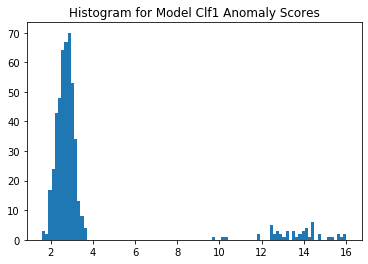

In [188]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

* We will identify the outliers as a cluster and demonstrate the X attributes

In [189]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<4, 0, 1)
df_test['cluster'].value_counts()

0    450
1     50
Name: cluster, dtype: int64

#### Describe the outliers
* We recommend observations in Cluster 1 to be outliers. 
* The attributes of Cluster 1 are shown below.

In [190]:
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.248812,0.235591,0.254013,0.239429,0.239101,0.255499,0.257207,0.24438,0.248004,0.251948,...,0.247737,0.251469,0.259140,0.249625,0.235669,0.244511,0.237602,0.246901,0.249373,2.690458
1,-2.239305,-2.120321,-2.286113,-2.154863,-2.151912,-2.299489,-2.314860,-2.19942,-2.232040,-2.267535,...,-2.229637,-2.263223,-2.332263,-2.246622,-2.121021,-2.200595,-2.138417,-2.222110,-2.244355,13.572872


#### Model 2

In [148]:
clf2 = AutoEncoder(hidden_neurons =[25, 10,2, 10, 25])
clf2.fit(X_train)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_79 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_80 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_81 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 10)                260       
__________

Epoch 57/100
450/450 [==============================] - 0s 314us/step - loss: 3.7880 - val_loss: 4.6009
Epoch 58/100
450/450 [==============================] - 0s 390us/step - loss: 3.7489 - val_loss: 4.5567
Epoch 59/100
450/450 [==============================] - 0s 441us/step - loss: 3.7197 - val_loss: 4.5093
Epoch 60/100
450/450 [==============================] - 0s 383us/step - loss: 3.7194 - val_loss: 4.4687
Epoch 61/100
450/450 [==============================] - 0s 414us/step - loss: 3.6421 - val_loss: 4.4246
Epoch 62/100
450/450 [==============================] - 0s 294us/step - loss: 3.5869 - val_loss: 4.3755
Epoch 63/100
450/450 [==============================] - 0s 241us/step - loss: 3.5450 - val_loss: 4.3366
Epoch 64/100
450/450 [==============================] - 0s 268us/step - loss: 3.5006 - val_loss: 4.3006
Epoch 65/100
450/450 [==============================] - 0s 268us/step - loss: 3.4571 - val_loss: 4.2623
Epoch 66/100
450/450 [==============================] - 0s 265us

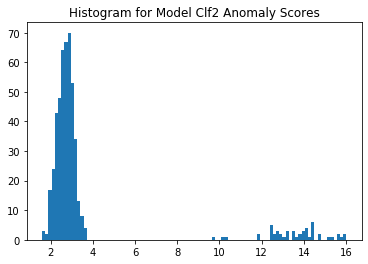

In [191]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

In [150]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<4, 0, 1)
df_test['cluster'].value_counts()

0    450
1     50
Name: cluster, dtype: int64

In [151]:
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.248812,0.235591,0.254013,0.239429,0.239101,0.255499,0.257207,0.24438,0.248004,0.251948,...,0.247737,0.251469,0.259140,0.249625,0.235669,0.244511,0.237602,0.246901,0.249373,2.713394
1,-2.239305,-2.120321,-2.286113,-2.154863,-2.151912,-2.299489,-2.314860,-2.19942,-2.232040,-2.267535,...,-2.229637,-2.263223,-2.332263,-2.246622,-2.121021,-2.200595,-2.138417,-2.222110,-2.244355,13.503675


#### Model 3

In [194]:
clf3 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10,15, 25])
clf3.fit(X_train)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_107 (Dropout)        (None, 25)                0         
_________________________________________________________________
dense_124 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_108 (Dropout)        (None, 25)                0         
_________________________________________________________________
dense_125 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_109 (Dropout)        (None, 25)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 15)                390       
__________

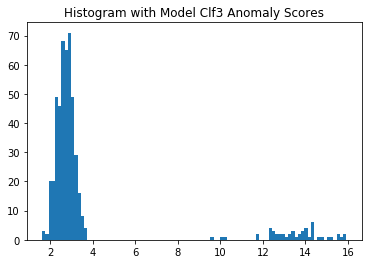

In [195]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram with Model Clf3 Anomaly Scores")
plt.show()

In [196]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<4, 0, 1)
df_test['cluster'].value_counts()

0    450
1     50
Name: cluster, dtype: int64

In [197]:
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.248812,0.235591,0.254013,0.239429,0.239101,0.255499,0.257207,0.24438,0.248004,0.251948,...,0.247737,0.251469,0.259140,0.249625,0.235669,0.244511,0.237602,0.246901,0.249373,2.717365
1,-2.239305,-2.120321,-2.286113,-2.154863,-2.151912,-2.299489,-2.314860,-2.19942,-2.232040,-2.267535,...,-2.229637,-2.263223,-2.332263,-2.246622,-2.121021,-2.200595,-2.138417,-2.222110,-2.244355,13.492314


## Achieve Model Stability by Aggregating Multiple Models
* Unsupervised techniques can detect many outliers. But due to its unspervised nature it is not stable, meaning overfitting to a specific dataset.
* The solution is to train multiple models then aggregate the scores. 
* There are four methods to aggregate the outcome:
* (1) Average: average scores of all detectors.
* (2) Maximum of Maximum (MOM)
* (3) Average of Maximum (AOM)
* (4) Maximum of Average (MOA)

In [157]:
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })

In [158]:
train_scores.head()

,clf1,clf2,clf3
0,2.744281,2.748175,2.756421
1,2.678067,2.684106,2.678962
2,2.787027,2.801398,2.804690
3,2.599440,2.605555,2.594357
4,2.258900,2.255297,2.260606


In [159]:
test_scores.head()

,clf1,clf2,clf3
0,2.489634,2.489359,2.491258
1,2.824517,2.825699,2.829461
2,2.989496,3.001760,2.999930
3,3.199205,3.205226,3.212102
4,2.810244,2.813492,2.812542


In [160]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [161]:
train_scores_norm.shape

(500, 3)

### Average
The "average" function in PyOD averages the outlier scores from multiple estimators.
See [PyOD API Reference](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.knn).

In [162]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([-0.29090929, -0.23915918, -0.17589335, -0.29530014, -0.37075356,
       -0.25045468, -0.38044267, -0.32721546, -0.33880127])

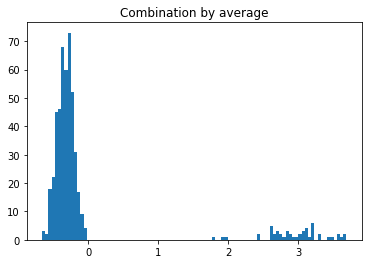

In [163]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

It appears we can identify those >=0.0 as the outliers

In [164]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<0, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    450
1     50
Name: y_by_average_cluster, dtype: int64

#### Describe the outliers

In [165]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.248812,0.235591,0.254013,0.239429,0.239101,0.255499,0.257207,0.24438,0.248004,0.251948,...,0.247737,0.251469,0.259140,0.249625,0.235669,0.244511,0.237602,0.246901,0.249373,-0.325752
1,-2.239305,-2.120321,-2.286113,-2.154863,-2.151912,-2.299489,-2.314860,-2.19942,-2.232040,-2.267535,...,-2.229637,-2.263223,-2.332263,-2.246622,-2.121021,-2.200595,-2.138417,-2.222110,-2.244355,2.951133


### Maximum of maximum
Merge the outlier scores from multiple estimators by taking the maximum.

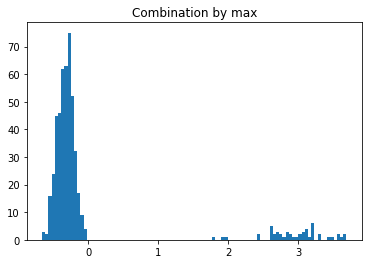

In [166]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

Similarly, it appears we can identify those >=0.0 as the outliers

In [192]:
df_test = X_test.copy()
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<0, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    450
1     50
Name: y_by_maximization_cluster, dtype: int64

#### Describe the outliers

In [193]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.248812,0.235591,0.254013,0.239429,0.239101,0.255499,0.257207,0.24438,0.248004,0.251948,...,0.247737,0.251469,0.259140,0.249625,0.235669,0.244511,0.237602,0.246901,0.249373,-0.324373
1,-2.239305,-2.120321,-2.286113,-2.154863,-2.151912,-2.299489,-2.314860,-2.19942,-2.232040,-2.267535,...,-2.229637,-2.263223,-2.332263,-2.246622,-2.121021,-2.200595,-2.138417,-2.222110,-2.244355,2.951898
